# Machine Learning Foundation

## Premier League Season stats

#### Premier League

The Premier League, often referred to as the English Premier League or the EPL (legal name: The Football Association Premier League Limited), is the top level of the English football league system. Contested by 20 clubs, it operates on a system of promotion and relegation with the English Football League (EFL). Seasons run from August to May with each team playing 38 matches (playing all 19 other teams both home and away). Most games are played on Saturday and Sunday afternoons.

The competition was founded as the FA Premier League on 20 February 1992 following the decision of clubs in the Football League First Division to break away from the Football League, founded in 1888, and take advantage of a lucrative television rights sale to Sky.From 2019 to 2020, the league's accumulated television rights deals were worth around £3.1 billion a year, with Sky and BT Group securing the domestic rights to broadcast 128 and 32 games respectively. The Premier League is a corporation where chief executive Richard Masters is responsible for its management, whilst the member clubs act as shareholders.Clubs were apportioned central payment revenues of £2.4 billion in 2016–17, with a further £343 million in solidarity payments to English Football League (EFL) clubs.

### Objective
This model is focused on try predict match total goals. 

### Dataset description
A dataset which contains a list of games, results and some numbers about the games of premier league, the england soccer league. 

 - [Dataset link](https://data.world/sportsvizsunday/august-eurofootball/workspace/file?filename=Soccer+History.xlsx)

### Features list
- Season: <b> string (years of the season where the games take place)</b> </b>
- Game:<b> int (number of each game at each team)</b>
- Unique ID:<b> string (unique id of each game)</b>
- Date:<b> string (date in dd/m/yyyy format)</b>	
- Team:<b> string (principal team name)</b>
- Opponent:<b> string (visitor team name)</b>
- Team G:<b> int (principal team goals)</b>
- Opp G:<b> int (visitor team goals)</b> 
- Win Loss:<b> string (status of principal team result, win, loss, draw)</b>  
- Points:<b> int (goals of game)</b> 
- Referee:<b> string (referee name of game)</b> 
- Team S:<b> int (principal team shoots)</b> 
- Opp S:<b> int (visitor team shoots)</b> 
- Team Fouls:<b> int (principal team fouls)</b> 
- Opp Fouls:<b> int (visitor team fouls)</b> 
- Team Corner:<b> int (principal team corners)</b> 
- Opp Corner:<b> int (visitor team corners)</b> 
- Team Yellows:<b> int (principal team yellow cards)</b> 
- Opp Yellow:<b> int (visitor team yellow cards)</b> 
- Team Red:<b> int (principal team red cards)</b> 
- Opp Red:<b> int (visitor team red cards)</b>


### Initial Plan
Explore and measure the quality and quantity of data, applying data cleansing and feature engineering techniques to gain insights and formulate hypotheses about the number of goals in a game. using data analysis techniques the object of this exploratory research is to understand variations and trends that can provide us with better clarity on how the results can be influenced according to the statistics of each game, after data analyses step we gonna try predict match total goals on plays.

### Initial Example of initialization code

In [1]:
#read the dataset
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
sns.set()

filepath = "data/premier league dataset history.csv"
data = pd.read_csv(filepath)
data.head()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


,Season,Game #,Unique ID,Date,Team,Opponent,Team G,Opp G,Win Loss,Points,...,Team SOT,Opp SOT,Team Fouls,Opp Fouls,Team Corner,Opp Corner,Team Yellows,Opp Yellow,Team Red,Opp Red
0,1993-94,1,Arsenal1,14/8/1993,Arsenal,Coventry,0,3,Loss,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,2,Arsenal2,16/8/1993,Arsenal,Tottenham,1,0,Win,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,3,Arsenal3,21/8/1993,Arsenal,Sheffield Weds,1,0,Win,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,4,Arsenal4,24/8/1993,Arsenal,Leeds,2,1,Win,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,5,Arsenal5,28/8/1993,Arsenal,Everton,2,0,Win,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#some observations

print('row number', data.shape[0])
print('collum number', data.shape[1])
print('feature names', data.columns.tolist())
print('seasons list',data.Season.unique())
print('teams names', data.Team.unique())

row number 20088
collum number 23
feature names ['Season', 'Game #', 'Unique ID', 'Date', 'Team', 'Opponent', 'Team G', 'Opp G', 'Win Loss', 'Points', 'Referee', 'Team S', 'Opp S', 'Team SOT', 'Opp SOT', 'Team Fouls', 'Opp Fouls', 'Team Corner', 'Opp Corner', 'Team Yellows', 'Opp Yellow', 'Team Red', 'Opp Red']
seasons list ['1993-94' '1994-95' '1995-96' '1996-97' '1997-98' '1998-99' '1999-00'
 '2000-01' '2001-02' '2002-03' '2003-04' '2004-05' '2005-06' '2006-07'
 '2007-08' '2008-09' '2009-10' '2010-11' '2011-12' '2012-13' '2013-14'
 '2014-15' '2015-16' '2016-17' '2017-18' '2018-19']
teams names ['Arsenal' 'Aston Villa' 'Blackburn' 'Chelsea' 'Coventry' 'Everton'
 'Ipswich' 'Leeds' 'Liverpool' 'Man City' 'Man United' 'Newcastle'
 'Norwich' 'Oldham' 'QPR' 'Sheffield United' 'Sheffield Weds'
 'Southampton' 'Swindon' 'Tottenham' 'West Ham' 'Wimbledon'
 'Crystal Palace' 'Leicester' "Nott'm Forest" 'Bolton' 'Middlesbrough'
 'Derby' 'Sunderland' 'Barnsley' 'Charlton' 'Bradford' 'Watford' 'Ful

### Data Cleaning and Feature engineering explanation

For data cleaning and engineering, several techniques were applied so that the dataset was satisfactory so that it could be used by any machine learning model that might require it, in this way the following techniques were performed for data cleaning and engineering

- Remove the UniqueId field, a unique field cannot be supply valid information to a data analyse.
- About missing values we chose to exclude the line that contains a missing value and matain 14440 observations
- Separate data field in tree fields, day, mouth and year.
- Convert the values loss, win and draw to 0,1 and 2 respectively.
- rename the win Loss column to result.
- Remove tha character '-' of season id (1993-94 to 199394).
- Create the columns total fouls, total corners, total yellow cards and total red cards.
- Identify and treat outliers, we chose to keep outliers due to the nature of the analysis being about a sport, it is relatively common in sports to get results strangely out of the curve
- rename column names to name most appropriate
- convert string variable to dummies with one hot encode technique
- save the filtred dataset in a new csv file

In [3]:
# remove uniqueId collumn

data1 = data.copy()
del data1['Unique ID']
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20088 entries, 0 to 20087
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Season        20088 non-null  object 
 1   Game #        20088 non-null  int64  
 2   Date          20088 non-null  object 
 3   Team          20088 non-null  object 
 4   Opponent      20088 non-null  object 
 5   Team G        20088 non-null  int64  
 6   Opp G         20088 non-null  int64  
 7   Win Loss      20088 non-null  object 
 8   Points        20088 non-null  int64  
 9   Referee       14440 non-null  object 
 10  Team S        14439 non-null  float64
 11  Opp S         14439 non-null  float64
 12  Team SOT      14440 non-null  float64
 13  Opp SOT       14440 non-null  float64
 14  Team Fouls    14440 non-null  float64
 15  Opp Fouls     14440 non-null  float64
 16  Team Corner   14440 non-null  float64
 17  Opp Corner    14440 non-null  float64
 18  Team Yellows  14440 non-nu

In [4]:
# remove missing values lines
data1.dropna(inplace=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14438 entries, 5648 to 20087
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Season        14438 non-null  object 
 1   Game #        14438 non-null  int64  
 2   Date          14438 non-null  object 
 3   Team          14438 non-null  object 
 4   Opponent      14438 non-null  object 
 5   Team G        14438 non-null  int64  
 6   Opp G         14438 non-null  int64  
 7   Win Loss      14438 non-null  object 
 8   Points        14438 non-null  int64  
 9   Referee       14438 non-null  object 
 10  Team S        14438 non-null  float64
 11  Opp S         14438 non-null  float64
 12  Team SOT      14438 non-null  float64
 13  Opp SOT       14438 non-null  float64
 14  Team Fouls    14438 non-null  float64
 15  Opp Fouls     14438 non-null  float64
 16  Team Corner   14438 non-null  float64
 17  Opp Corner    14438 non-null  float64
 18  Team Yellows  14438 non

In [5]:
# separate data field in tree fields
data1.Date = pd.to_datetime(data1.Date)
data1['year'] = data1['Date'].dt.year
data1['day'] = data1['Date'].dt.day
data1['month'] = data1['Date'].dt.month

del data1['Date']
data1


,Season,Game #,Team,Opponent,Team G,Opp G,Win Loss,Points,Referee,Team S,...,Opp Fouls,Team Corner,Opp Corner,Team Yellows,Opp Yellow,Team Red,Opp Red,year,day,month
5648,2000-01,1,Arsenal,Sunderland,0,1,Loss,0,Steve Dunn,14.0,...,10.0,9.0,2.0,1.0,3.0,1.0,0.0,2000,19,8
5649,2000-01,2,Arsenal,Liverpool,2,0,Win,3,Graham Poll,17.0,...,20.0,10.0,11.0,2.0,4.0,1.0,2.0,2000,21,8
5650,2000-01,3,Arsenal,Charlton,5,3,Win,3,Steve Lodge,18.0,...,15.0,8.0,3.0,0.0,1.0,0.0,0.0,2000,26,8
5651,2000-01,4,Arsenal,Chelsea,2,2,Draw,1,Mike Riley,13.0,...,16.0,6.0,7.0,1.0,3.0,0.0,0.0,2000,9,6
5652,2000-01,5,Arsenal,Bradford,1,1,Draw,1,Alan Wiley,18.0,...,17.0,10.0,4.0,2.0,0.0,0.0,0.0,2000,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20083,2018-19,34,Wolves,Brighton,0,0,Draw,1,C Pawson,22.0,...,8.0,14.0,1.0,0.0,1.0,0.0,0.0,2019,20,4
20084,2018-19,35,Wolves,Arsenal,3,1,Win,3,S Attwell,11.0,...,9.0,5.0,5.0,2.0,3.0,0.0,0.0,2019,24,4
20085,2018-19,36,Wolves,Watford,2,1,Win,3,S Hooper,11.0,...,10.0,5.0,4.0,2.0,3.0,0.0,0.0,2019,27,4
20086,2018-19,37,Wolves,Fulham,1,0,Win,3,J Moss,19.0,...,15.0,7.0,1.0,1.0,3.0,0.0,0.0,2019,4,5


In [6]:
# convert the values draw, loss, win to int

data1['Win Loss'] = data1['Win Loss'].astype(str)
data1['Win Loss'] = data1['Win Loss'].str.replace('Win', '1')
data1['Win Loss'] = data1['Win Loss'].str.replace('Loss', '0')
data1['Win Loss'] = data1['Win Loss'].str.replace('Draw', '2')

data1.rename(columns={'Win Loss': 'result'}, inplace=True)


data1

,Season,Game #,Team,Opponent,Team G,Opp G,result,Points,Referee,Team S,...,Opp Fouls,Team Corner,Opp Corner,Team Yellows,Opp Yellow,Team Red,Opp Red,year,day,month
5648,2000-01,1,Arsenal,Sunderland,0,1,0,0,Steve Dunn,14.0,...,10.0,9.0,2.0,1.0,3.0,1.0,0.0,2000,19,8
5649,2000-01,2,Arsenal,Liverpool,2,0,1,3,Graham Poll,17.0,...,20.0,10.0,11.0,2.0,4.0,1.0,2.0,2000,21,8
5650,2000-01,3,Arsenal,Charlton,5,3,1,3,Steve Lodge,18.0,...,15.0,8.0,3.0,0.0,1.0,0.0,0.0,2000,26,8
5651,2000-01,4,Arsenal,Chelsea,2,2,2,1,Mike Riley,13.0,...,16.0,6.0,7.0,1.0,3.0,0.0,0.0,2000,9,6
5652,2000-01,5,Arsenal,Bradford,1,1,2,1,Alan Wiley,18.0,...,17.0,10.0,4.0,2.0,0.0,0.0,0.0,2000,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20083,2018-19,34,Wolves,Brighton,0,0,2,1,C Pawson,22.0,...,8.0,14.0,1.0,0.0,1.0,0.0,0.0,2019,20,4
20084,2018-19,35,Wolves,Arsenal,3,1,1,3,S Attwell,11.0,...,9.0,5.0,5.0,2.0,3.0,0.0,0.0,2019,24,4
20085,2018-19,36,Wolves,Watford,2,1,1,3,S Hooper,11.0,...,10.0,5.0,4.0,2.0,3.0,0.0,0.0,2019,27,4
20086,2018-19,37,Wolves,Fulham,1,0,1,3,J Moss,19.0,...,15.0,7.0,1.0,1.0,3.0,0.0,0.0,2019,4,5


In [7]:
# Remove tha character '-' of season id (1993-94 to 199394).

data1.Season = data1.Season.str.replace('-', '')

data1.head()

,Season,Game #,Team,Opponent,Team G,Opp G,result,Points,Referee,Team S,...,Opp Fouls,Team Corner,Opp Corner,Team Yellows,Opp Yellow,Team Red,Opp Red,year,day,month
5648,200001,1,Arsenal,Sunderland,0,1,0,0,Steve Dunn,14.0,...,10.0,9.0,2.0,1.0,3.0,1.0,0.0,2000,19,8
5649,200001,2,Arsenal,Liverpool,2,0,1,3,Graham Poll,17.0,...,20.0,10.0,11.0,2.0,4.0,1.0,2.0,2000,21,8
5650,200001,3,Arsenal,Charlton,5,3,1,3,Steve Lodge,18.0,...,15.0,8.0,3.0,0.0,1.0,0.0,0.0,2000,26,8
5651,200001,4,Arsenal,Chelsea,2,2,2,1,Mike Riley,13.0,...,16.0,6.0,7.0,1.0,3.0,0.0,0.0,2000,9,6
5652,200001,5,Arsenal,Bradford,1,1,2,1,Alan Wiley,18.0,...,17.0,10.0,4.0,2.0,0.0,0.0,0.0,2000,9,9


In [8]:
# Create the columns total fouls, total corners, total yellow cards and total red cards.

data1['total_fouls'] = data1['Team Fouls'] + data1['Opp Fouls']
data1['total_corners'] = data1['Team Corner'] + data1['Opp Corner']
data1['total_yellow'] = data1['Team Yellows'] + data1['Opp Yellow']
data1['total_red'] = data1['Team Red'] + data1['Opp Red']
data1['total_gols'] = data1['Team G'] + data1['Opp G']

data1.head()

,Season,Game #,Team,Opponent,Team G,Opp G,result,Points,Referee,Team S,...,Team Red,Opp Red,year,day,month,total_fouls,total_corners,total_yellow,total_red,total_gols
5648,200001,1,Arsenal,Sunderland,0,1,0,0,Steve Dunn,14.0,...,1.0,0.0,2000,19,8,31.0,11.0,4.0,1.0,1
5649,200001,2,Arsenal,Liverpool,2,0,1,3,Graham Poll,17.0,...,1.0,2.0,2000,21,8,45.0,21.0,6.0,3.0,2
5650,200001,3,Arsenal,Charlton,5,3,1,3,Steve Lodge,18.0,...,0.0,0.0,2000,26,8,27.0,11.0,1.0,0.0,8
5651,200001,4,Arsenal,Chelsea,2,2,2,1,Mike Riley,13.0,...,0.0,0.0,2000,9,6,38.0,13.0,4.0,0.0,4
5652,200001,5,Arsenal,Bradford,1,1,2,1,Alan Wiley,18.0,...,0.0,0.0,2000,9,9,30.0,14.0,2.0,0.0,2


array([[<AxesSubplot:title={'center':'total_fouls'}>,
        <AxesSubplot:title={'center':'total_corners'}>],
       [<AxesSubplot:title={'center':'total_yellow'}>,
        <AxesSubplot:title={'center':'total_red'}>]], dtype=object)

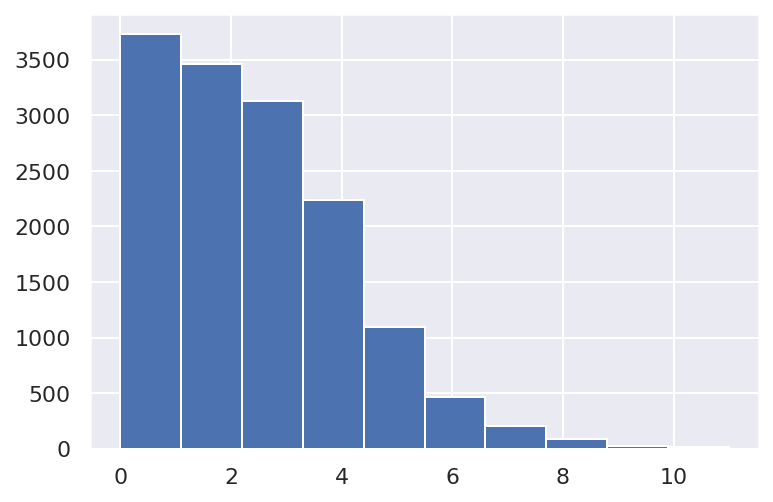

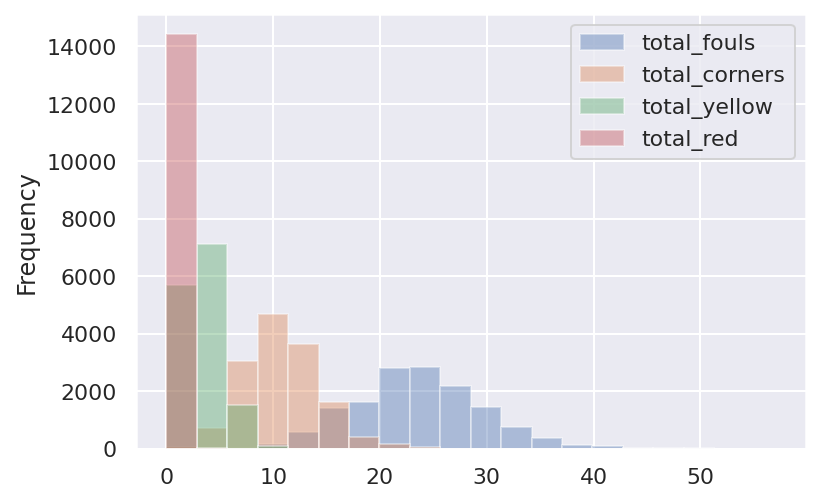

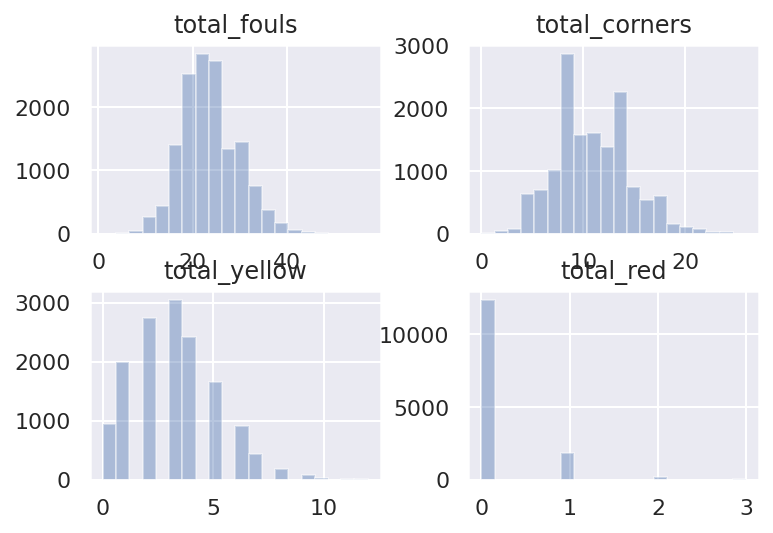

In [9]:
#observate outliers
data1['total_gols'].hist(label='total gols')

dataTotals = data1[['total_fouls', 'total_corners', 'total_yellow', 'total_red']]

dataTotals.plot.hist(alpha=0.4, bins=20)
dataTotals.hist(alpha=0.4, bins=20)



In [10]:
# rename columns names

data2 = data1.rename(columns=str.lower)
data2.columns = data2.columns.str.replace(' ','_')
data2.rename({'game_#': 'game_id'}, axis=1, inplace=True)

data2.head()

,season,game_id,team,opponent,team_g,opp_g,result,points,referee,team_s,...,team_red,opp_red,year,day,month,total_fouls,total_corners,total_yellow,total_red,total_gols
5648,200001,1,Arsenal,Sunderland,0,1,0,0,Steve Dunn,14.0,...,1.0,0.0,2000,19,8,31.0,11.0,4.0,1.0,1
5649,200001,2,Arsenal,Liverpool,2,0,1,3,Graham Poll,17.0,...,1.0,2.0,2000,21,8,45.0,21.0,6.0,3.0,2
5650,200001,3,Arsenal,Charlton,5,3,1,3,Steve Lodge,18.0,...,0.0,0.0,2000,26,8,27.0,11.0,1.0,0.0,8
5651,200001,4,Arsenal,Chelsea,2,2,2,1,Mike Riley,13.0,...,0.0,0.0,2000,9,6,38.0,13.0,4.0,0.0,4
5652,200001,5,Arsenal,Bradford,1,1,2,1,Alan Wiley,18.0,...,0.0,0.0,2000,9,9,30.0,14.0,2.0,0.0,2


In [11]:
# convert string variable to dummies with one hot encode technic

data2.season = data2.season.astype(int)
data2.result = data2.result.astype(int)

one_hot_encode_cols = data2.dtypes[data2.dtypes == "object"]
one_hot_encode_cols = one_hot_encode_cols.index.tolist()

data_hot_encoded = pd.get_dummies(data2, columns=one_hot_encode_cols, drop_first=True)
data_hot_encoded


,season,game_id,team_g,opp_g,result,points,team_s,opp_s,team_sot,opp_sot,...,referee_l Mason,referee_ A D'Urso,referee_ A Wiley,referee_ C Foy,referee_ D Gallagher,referee_ H Webb,referee_ M Atkinson,referee_ N Barry,referee_ S Dunn,referee_ U Rennie
5648,200001,1,0,1,0,0,14.0,8.0,7.0,2.0,...,0,0,0,0,0,0,0,0,0,0
5649,200001,2,2,0,1,3,17.0,7.0,12.0,4.0,...,0,0,0,0,0,0,0,0,0,0
5650,200001,3,5,3,1,3,18.0,7.0,9.0,4.0,...,0,0,0,0,0,0,0,0,0,0
5651,200001,4,2,2,2,1,13.0,12.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
5652,200001,5,1,1,2,1,18.0,9.0,11.0,5.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20083,201819,34,0,0,2,1,22.0,5.0,5.0,0.0,...,0,0,0,0,0,0,0,0,0,0
20084,201819,35,3,1,1,3,11.0,11.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
20085,201819,36,2,1,1,3,11.0,10.0,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0
20086,201819,37,1,0,1,3,19.0,6.0,6.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# save the new csv file

from pathlib import Path  
filepath = Path('data/out.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data_hot_encoded.to_csv(filepath)  

### Summary of training

Trainning tachnics applyeds:

- Linear regression simple
- Linear regression with standard scaller
- Lasso regression with Hyperparameters alphas
- Ridge regresion with Hyperparameters alphas
- polynomial features to regularization model


In [13]:
# test if can be predicted total gols with linear simple regression

X = data_hot_encoded.drop(['team_g', 'opp_g', 'total_gols'], axis=1)
y = data_hot_encoded[['total_gols']]

kf = KFold(shuffle=True, random_state=72018, n_splits=3)

scores = []
s = StandardScaler()
lr = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index, :], y.iloc[test_index, :]
    lr.fit(X_train, y_train)    
    y_pred = lr.predict(X_test)
    score = r2_score(y_test.values, y_pred)
    scores.append(score)

estimator = Pipeline([("regression", lr)])

predictions = cross_val_predict(estimator, X, y, cv=kf)
print(scores, r2_score(y, predictions), np.mean(scores))

# result is very low, so we need try to uses lasso regression and ridge regression with hyperparameters

[0.13394882750515547, -40244.17232894752, -30.92558717766545] -14029.86017900848 -13424.987989099225


In [33]:
#  lasso regression with alphas test with polynomial features

pf = PolynomialFeatures(degree=1)
alphas = np.geomspace(1e-9, 1e0, num=10)
coefs = []
lasso_alpha_scores = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=1000)
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    lasso_alpha_score = r2_score(y, predictions)
    
    lasso_alpha_scores.append(lasso_alpha_score)

lasso_alpha_scores


/home/christian/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.039e+04, tolerance: 2.701e+00
  model = cd_fast.enet_coordinate_descent(
/home/christian/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.015e+04, tolerance: 2.612e+00
  model = cd_fast.enet_coordinate_descent(
/home/christian/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

[0.18818750151612773,
 0.18818751403350087,
 0.18818763920689652,
 0.18818891791694492,
 0.1882014605472523,
 0.18832060585021182,
 0.18909154780529192,
 0.19187384085858405,
 0.15125386149630948,
 -1.8763878649741272e-05]

In [34]:
list(zip(alphas,lasso_alpha_scores))

[(1e-09, 0.18818750151612773),
 (1e-08, 0.18818751403350087),
 (1e-07, 0.18818763920689652),
 (1e-06, 0.18818891791694492),
 (1e-05, 0.1882014605472523),
 (0.0001, 0.18832060585021182),
 (0.001, 0.18909154780529192),
 (0.01, 0.19187384085858405),
 (0.1, 0.15125386149630948),
 (1.0, -1.8763878649741272e-05)]

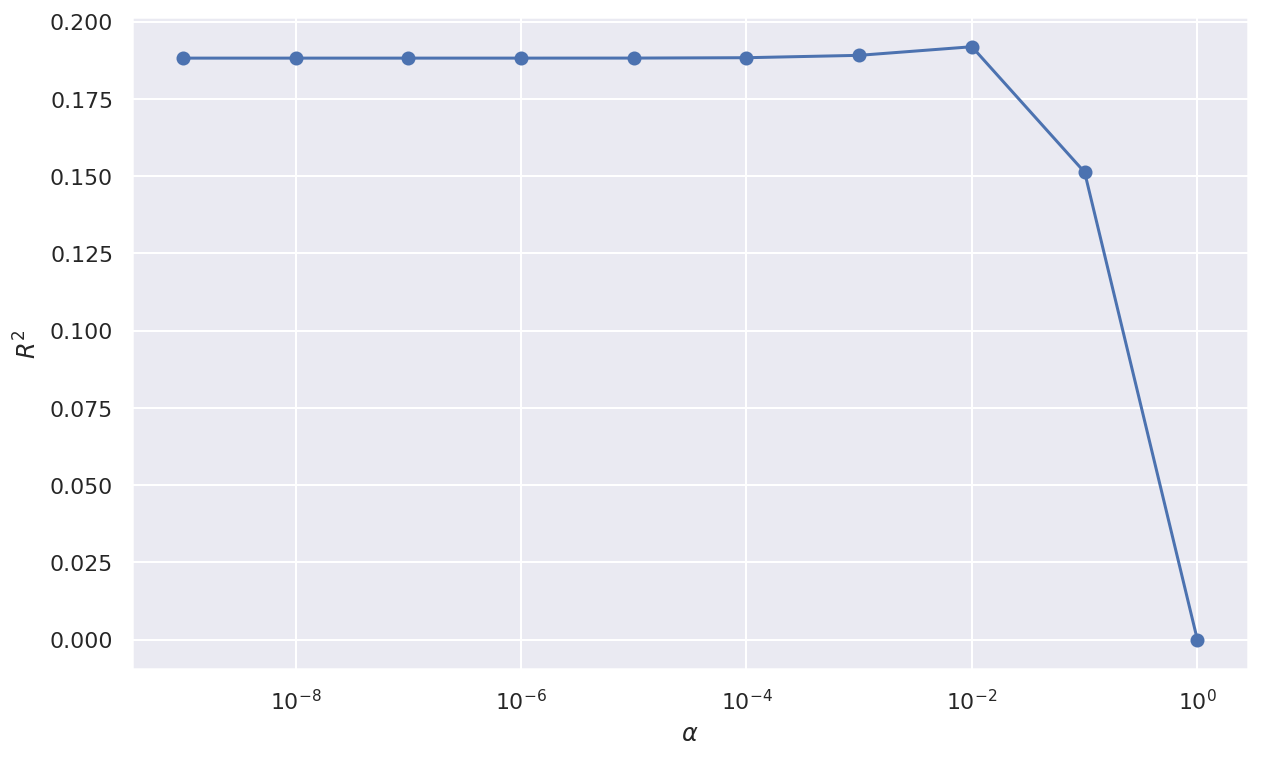

In [35]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, lasso_alpha_scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [37]:
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=1)),
                    ("lasso_regression", Lasso(alpha=0.01))])


best_estimator.fit(X, y)
best_estimator.score(X, y)

[2.18730293 2.97315188 2.84050846 1.59348265 2.33740194 3.35236233
 1.8440827  2.10225494 2.93265313]       total_gols
5648           1
5649           2
5650           8
5651           4
5652           2
5653           3
5654           2
5655           1
5656           1


0.21169758924190396

[(4.0, 0.18821469510016164), (4.405025362823014, 0.18821923410099006), (4.8510621117785035, 0.18822392865350468), (5.342262909753518, 0.18822877951958417), (5.883200903083229, 0.18823378881993258), (6.47891229816622, 0.18823896027734677), (7.134943249232032, 0.1882442994166279), (7.857401493792484, 0.18824981370996619), (8.65301321650983, 0.18825551265888185), (9.529185670892137, 0.18826140780633438), (10.49407614183237, 0.1882675126751261), (11.556667891041863, 0.18827384263090496), (12.726853792440433, 0.1882804146696857), (14.015528436160094, 0.18828724713062828), (15.434689558663091, 0.1882943593347135), (16.99754974330261, 0.18830177114884605), (18.718659431273455, 0.18830950247276113), (20.614042388201426, 0.18831757264294224), (22.701344887583996, 0.18832599974358166), (25.0, 0.18833479980953416)]


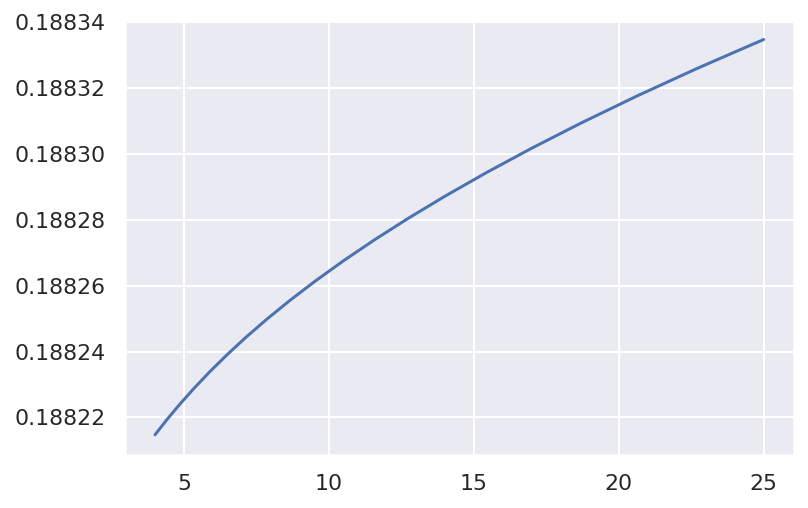

In [42]:
# ridge regression test with polynomial features

pf = PolynomialFeatures(degree=1)
alphas = np.geomspace(4, 25, 20)
scores_ridge=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score_ridge = r2_score(y, predictions)
    scores_ridge.append(score_ridge)

print(list(zip(alphas,scores_ridge)))

plt.plot(alphas, scores_ridge)

### Result of experiments

The best result is the Lasso regression with alphas 0.01, the accuracy of this regression is
0.21169758924190396, but this result is very low, due to this it was concluded that it is impossible to predict the number of goals, at least with these dataset

### Key Findings and Insights

After extensive analysis we were able to reach the following conclusions based on the experiments shown below.


- We found an apparent relationship between number of goals and number of fouls, apparently games with high number of goals tend to have low number of fouls.

- the average goals increase by 0.1 from 2000 to 2018, a negligible increase, can be interpreted as a normal variation.

- the average number of absences decreased from 27 in 2000 to 19 in 2018, a continuous drop between years of approximately 30%.

- despite the number of fouls having dropped, the number of red cards remained stable.

- We found another apparent relationship between number of goals and number of corners, apparently games with high number of goals tend to have a median number of corners.

- corners and fouls stop the game, so the time taken by corners and fouls is likely to decrease the number of chances for goals due to the ball being out of play.

- when the game has 3 red cards or more, the average of goals increases by approximately 1 goal.

- Teams with fewer fouls achieved a higher frequency of wins.

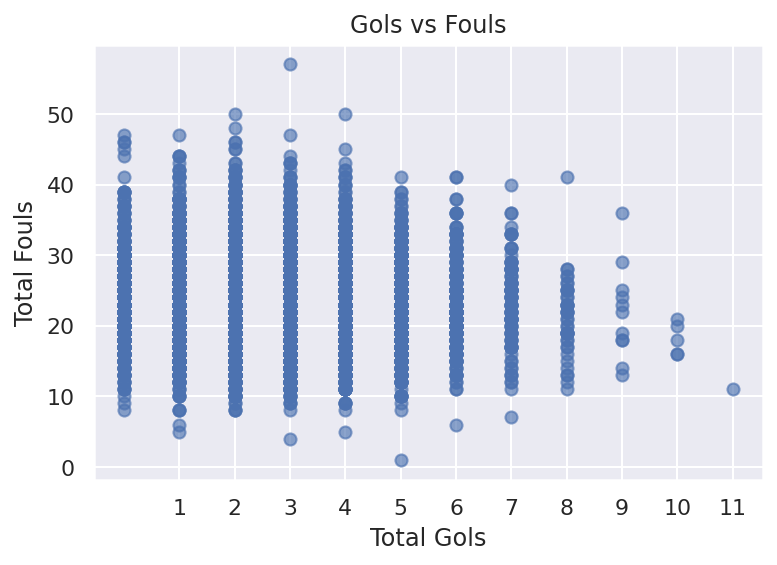

In [15]:
### Key Findings and Insights

ax = plt.axes()

plt.xticks(range(1, 12))


ax.scatter(data2.total_gols, data2.total_fouls, alpha=0.4)

# Label the axes
ax.set(xlabel='Total Gols',
       ylabel='Total Fouls',
       title='Gols vs Fouls');


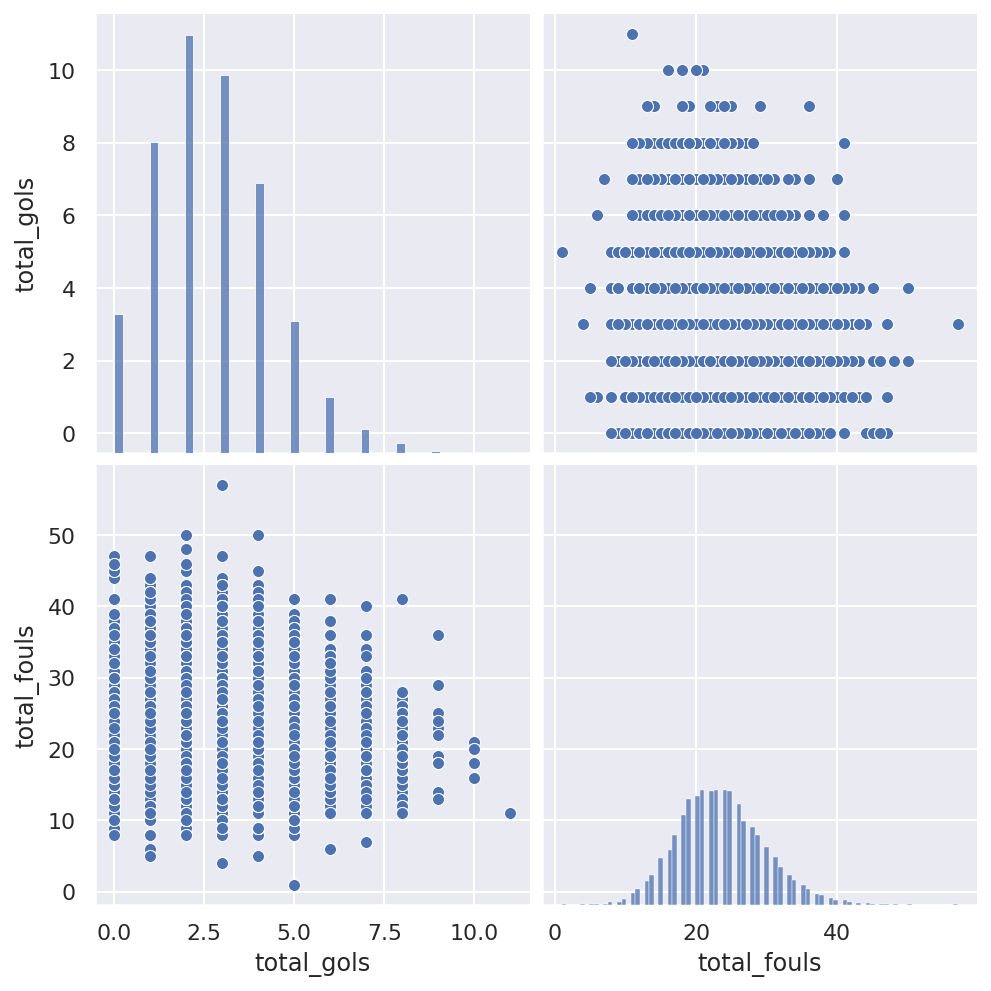

In [16]:
sns.pairplot(data2,height=3.5, vars=['total_gols', 'total_fouls'])

<AxesSubplot:xlabel='year'>

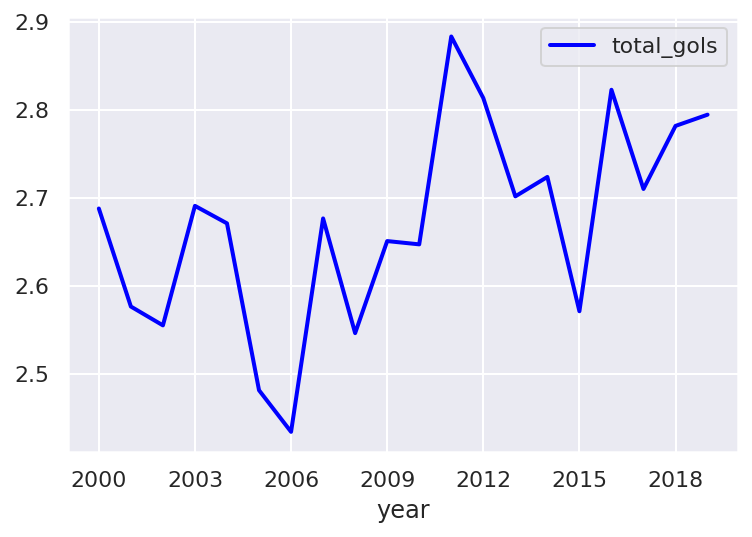

In [17]:
gols_by_year = data2[['total_gols', 'year']]
gols_by_year = gols_by_year.groupby('year').mean()

gols_by_year.plot(kind="line", color="blue", linewidth=2, xticks=range(2000, 2020, 3))

<AxesSubplot:xlabel='year'>

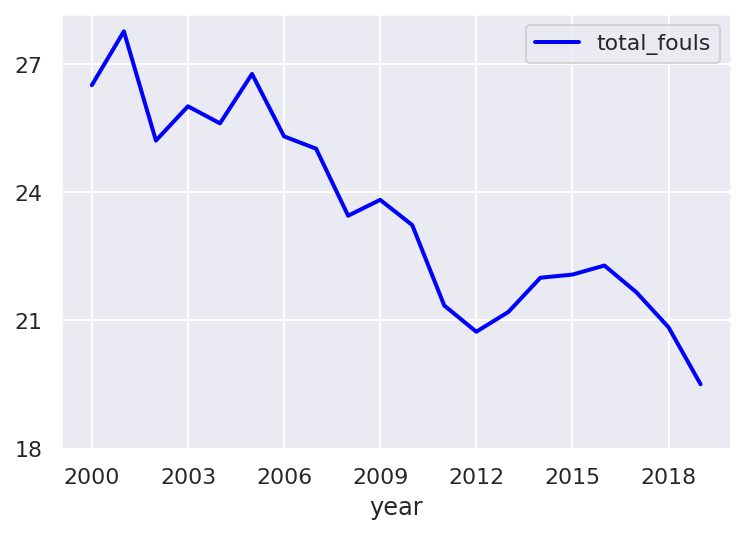

In [18]:
gols_by_year = data2[['total_fouls', 'year']]
gols_by_year = gols_by_year.groupby('year').mean()

gols_by_year.plot(kind="line", color="blue", linewidth=2, xticks=range(2000, 2020, 3), yticks=range(18, 30, 3))

<AxesSubplot:xlabel='year'>

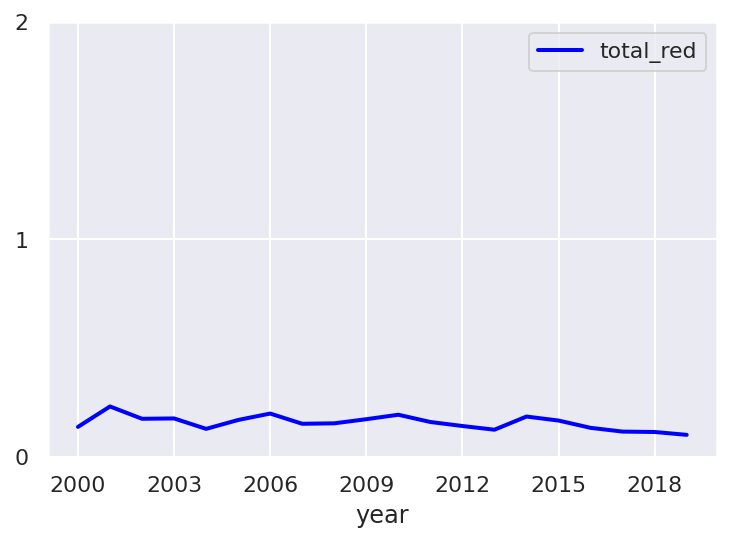

In [19]:
gols_by_year = data2[['total_red', 'year']]
gols_by_year = gols_by_year.groupby('year').mean()

gols_by_year.plot(kind="line", color="blue", linewidth=2, xticks=range(2000, 2020, 3), yticks=range(0, 3, 1))

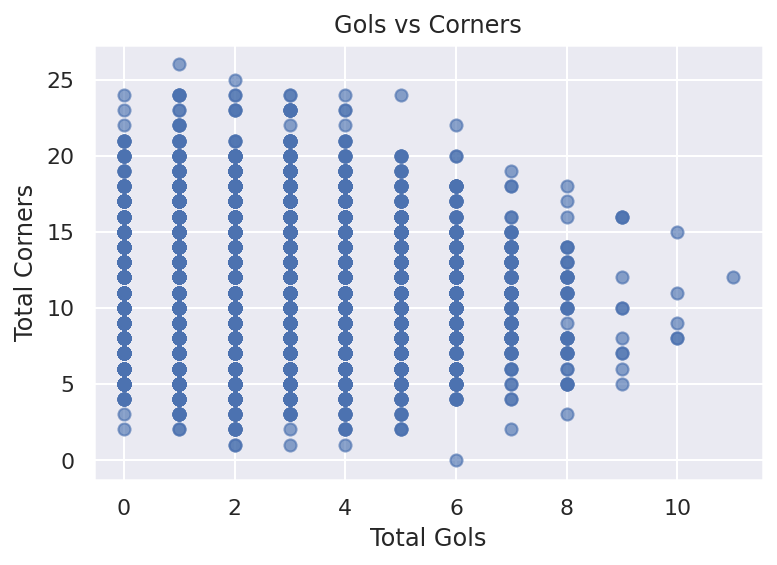

In [20]:
ax2 = plt.axes()

ax2.scatter(data2.total_gols, data2.total_corners, alpha=0.4)

# Label the axes
ax2.set(xlabel='Total Gols',
       ylabel='Total Corners',
       title='Gols vs Corners');

In [21]:
#referee analysis

data_referee = data2[['referee', 'total_fouls']].groupby('referee')

data_referee.mean()

,total_fouls
referee,
A D'Urso,25.232143
A Madley,16.500000
A Marriner,21.418006
A Taylor,21.460177
A Wiley,26.004854
...,...
H Webb,24.000000
M Atkinson,17.000000
N Barry,28.000000


<AxesSubplot:xlabel='total_red'>

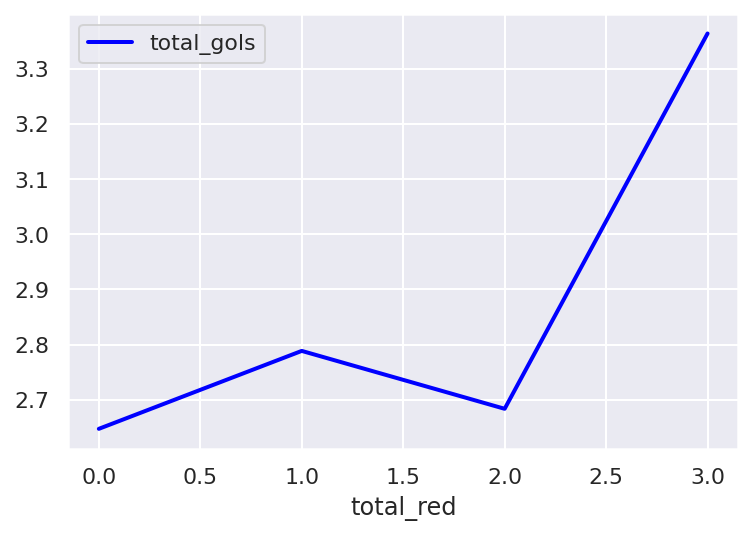

In [22]:
win_by_red = data2[['total_red', 'total_gols']]
win_by_red = win_by_red.groupby('total_red').mean()

win_by_red.plot(kind="line", color="blue", linewidth=2,)

### hypothesis

After the initial analysis we were able to raise three possible hypotheses for our exploration

 - hypothesis 1: A team that receives a red card is more likely to receive a goal.
 - hypothesis 2: The team that commits more fouls, are more likely to win.
 - hypothesis 3: The fact that a team scores a goal increases its own chance of conceding a goal.

### Test result of hypothesis 3

FALSE, the teams that have the highest frequency of victories are the team with less number of fouls, in the research the teams with most elevate number of fouls reached a maximum of 40% of victories while the teams with lesser fouls reached up to 60% of victories.



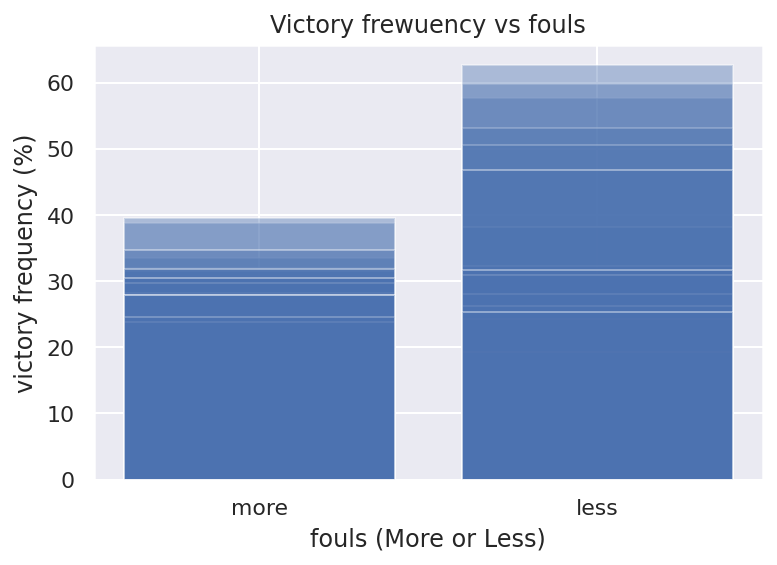

In [23]:
### Hypothesis test The team that commits more fouls, has better results.

teams_data = data2[['team', 'team_fouls', 'result']]
teams_result = teams_data[['team', 'result']]
team_fouls_median = teams_data.describe().agg(['50%'])['team_fouls'][0]

teams_result_median = teams_data.groupby('team').median()[['team_fouls']]

teams_more_fouls = teams_result_median[teams_result_median['team_fouls'] >= team_fouls_median]
teams_fewer_fouls = teams_result_median[teams_result_median['team_fouls'] < team_fouls_median]

teams_more_fouls_index = teams_more_fouls.index.tolist()
teams_fewer_fouls_index = teams_fewer_fouls.index.tolist()

teams_victory_frequency = pd.DataFrame({})

for team in teams_more_fouls_index:
    filtred_by_team = teams_result[teams_result['team'] == team]
    victory_frequency = (filtred_by_team['result'].value_counts(normalize=True) * 100)[1]
    new_line = pd.DataFrame({'victory_frequency': [victory_frequency], 'fouls': ['more'] }, index=[team])
    teams_victory_frequency = teams_victory_frequency.append(new_line)
    
for team in teams_fewer_fouls_index:
    filtred_by_team = teams_result[teams_result['team'] == team]
    victory_frequency = (filtred_by_team['result'].value_counts(normalize=True) * 100)[1]
    new_line = pd.DataFrame({'victory_frequency': [victory_frequency], 'fouls': ['less'] }, index=[team])
    teams_victory_frequency = teams_victory_frequency.append(new_line)
    
ax3 = plt.axes()
ax3.bar(teams_victory_frequency.fouls, teams_victory_frequency.victory_frequency, alpha=0.4)

# Label the axes
ax3.set(xlabel='fouls (More or Less)',
       ylabel='victory frequency (%)',
       title='Victory frewuency vs fouls');


### Suggestions for next steps in analyzing this data

 - Analyse if the results of games can be influenced by the referee
 - Analyse if the number of goals can be influenced by the previous game
 - Analyse if the number of games in a season can influence the number of goals, cards and fols

### Quality of dataset and requets for more data

The general quality of this data set is satisfactory for a superficial analysis of game results, we can raise some hypotheses and some factors that influence the result of the English league, however, for a more in-depth analysis, a larger set of features would be necessary, it would be plausible require data from

  - Period of the game in which the goals were scored
  - Game period in which the cards came out
  - If the game has added to its time
  - What positions of the expelled players
  - Which players scored the goals
  - Goals disallowed
  - Goals disallowed by VAR
  - expulsions reviewed by VAR